In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [188]:
training = pd.read_csv('/content/drive/MyDrive/titanic_ML/train.csv')
testing = pd.read_csv('/content/drive/MyDrive/titanic_ML/test.csv')

In [189]:
print(training.shape)
training.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
print(testing.shape)
testing.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [191]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [192]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [193]:
#counting indivdual cabin values 
training.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

**Filling Null Values for Training dataset**

In [194]:
training['Age'].fillna(int(training['Age'].mean()), inplace=True)
training['Cabin'].fillna(training['Cabin'].mode().values[0],inplace=True)
training['Embarked'].fillna(training['Embarked'].mode().values[0],inplace=True)


In [195]:
training.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Filling Null Values for Testing dataset**

In [196]:
testing['Age'].fillna(int(testing['Age'].mean()), inplace=True)
testing['Fare'].fillna(int(testing['Fare'].mean()), inplace=True)
testing['Cabin'].fillna(testing['Cabin'].mode().values[0],inplace=True)
testing['Embarked'].fillna(testing['Embarked'].mode().values[0],inplace=True)
                           


In [197]:
testing.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [198]:
#seeing unique values of cabin coloumn so that null values can be filled
#training['Cabin'].unique()

In [199]:
training.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [200]:
#mapping boolean (0,1) to (flase,true) in training data
"""training['Survived'] = training['Survived'].map({1: 'yes', 0: 'no'})
training.head()"""

"training['Survived'] = training['Survived'].map({1: 'yes', 0: 'no'})\ntraining.head()"

In [201]:
#finding total count of male and female
training.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [202]:
#checking survived passengers grouped by male and female 
df = training.groupby('Sex')['Survived'].value_counts()
print(df)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


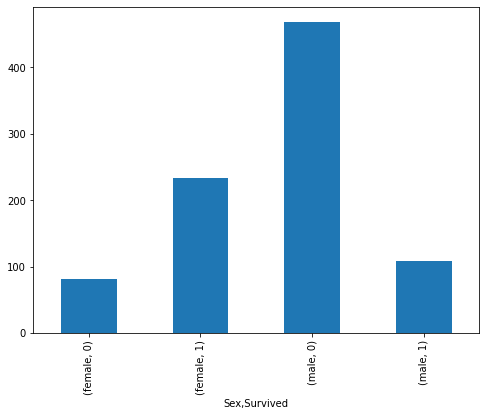

In [203]:
#plotting survived(1) and not-survived(0) male and female
training.groupby(['Sex','Survived'])['Survived'].count().plot.bar(figsize=(8, 6))

**Now will do Label Decodoing**

In [204]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
ordinal_features = ['Sex', 'Age', 'Fare']
categorical_features = ['Embarked']
join_feature = ['PassengerId']
combine= [training, testing]

encoder = LabelEncoder()

for df in combine:

  # Encode ordinal features
  for feature in ordinal_features:    
    df[feature] = encoder.fit_transform(df[feature])

# Encode categorical features
dummies = pd.get_dummies(training[categorical_features + join_feature])
training = pd.merge(training, dummies, on = "PassengerId")
training.drop(columns = categorical_features, inplace = True)

dummies = pd.get_dummies(testing[categorical_features + join_feature])
testing = pd.merge(testing, dummies, on = "PassengerId")
testing.drop(columns = categorical_features, inplace = True)

In [205]:
#finding correaltion of training data set
corr = training.corr()

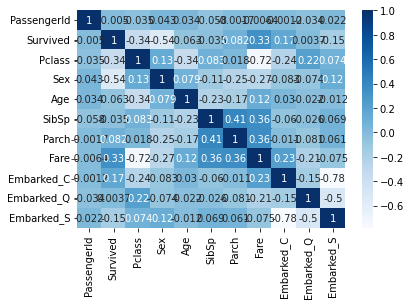

In [206]:

sn.heatmap(corr, cmap='Blues', annot=True)
plt.show()


In [207]:
from sklearn.model_selection import train_test_split
X= training.drop(['Name','Survived','Ticket','Cabin'],axis=1)
y = training['Survived']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [208]:
X_test.shape


(295, 10)

In [209]:
X_train.shape

(596, 10)

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [211]:
pipe.score(X_test, y_test)



0.8135593220338984

In [212]:
regressor = LogisticRegression(solver='lbfgs', max_iter=1000)
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [213]:
prediction = regressor.predict(X_test)

In [214]:
from sklearn.metrics import classification_report
target_names = ['Not survived(0)', 'Survived(1)']
print(classification_report(y_test,prediction, target_names=target_names))

                 precision    recall  f1-score   support

Not survived(0)       0.82      0.87      0.85       175
    Survived(1)       0.80      0.72      0.76       120

       accuracy                           0.81       295
      macro avg       0.81      0.80      0.80       295
   weighted avg       0.81      0.81      0.81       295



In [215]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[153,  22],
       [ 33,  87]])

Text(0.5, 257.44, 'Predicted label')

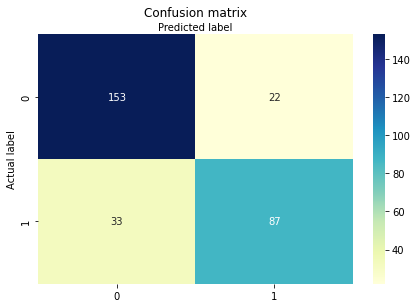

In [216]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



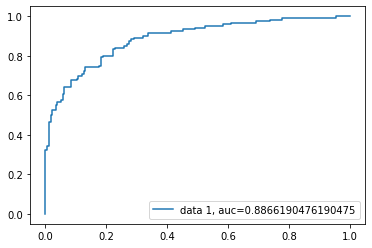

In [217]:
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)/100
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.19
Mean squared error: 0.19
Root mean squared error: 0.00


In [219]:
predict_data = testing.drop(['Name','Ticket','Cabin'],axis=1)
predict_data.shape
#prediction = regressor.predict(predict_data)

(418, 10)

In [220]:
prediction = regressor.predict(predict_data)

In [221]:
testing['Sex'] = testing['Sex'].map({1: 'Male', 0: 'Female'})
new_predict_df = pd.DataFrame(prediction, columns = ['Survived or not Survived'])
passengerID = testing['PassengerId']
gender = testing['Sex']
df = new_predict_df.assign(PassengerID = passengerID, Gender = gender)






In [222]:
df = df[['PassengerID','Gender','Survived or not Survived']]


In [223]:
df

,PassengerID,Gender,Survived or not Survived
0,892,Male,0
1,893,Female,0
2,894,Male,0
3,895,Male,0
4,896,Female,1
...,...,...,...
413,1305,Male,0
414,1306,Female,1
415,1307,Male,0
416,1308,Male,0


In [228]:
#checking survived passengers grouped by male and female 
df_count = df.groupby('Gender')['Survived or not Survived'].value_counts()

print(df_count)

Gender  Survived or not Survived
Female  1                           142
        0                            10
Male    0                           255
        1                            11
Name: Survived or not Survived, dtype: int64


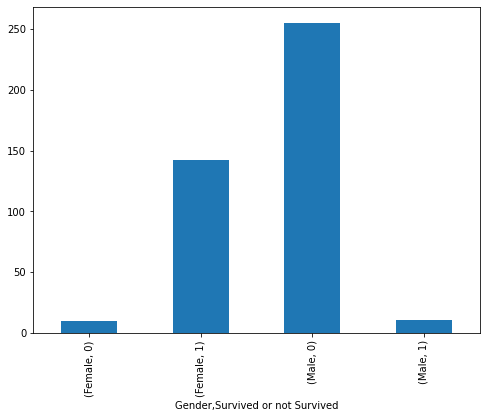

In [229]:
#plotting survived(1) and not-survived(0) male and female from the test dataset
df.groupby(['Gender','Survived or not Survived'])['Survived or not Survived'].count().plot.bar(figsize=(8, 6))